<a href="https://colab.research.google.com/github/Dave4Dw/Biomedical-Engineering/blob/master/ClassificationQuiz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
!wget clone https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv

--2020-08-26 16:15:57--  http://clone/
Resolving clone (clone)... failed: Name or service not known.
wget: unable to resolve host address ‘clone’
--2020-08-26 16:15:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2417871 (2.3M) [application/x-httpd-php]
Saving to: ‘Data_for_UCI_named.csv’

Data_for_UCI_named. 100%[===================>]   2.31M  5.09MB/s    in 0.5s    

2020-08-26 16:15:57 (5.09 MB/s) - ‘Data_for_UCI_named.csv’ saved [2417871/2417871]

FINISHED --2020-08-26 16:15:57--
Total wall clock time: 0.8s
Downloaded: 1 files, 2.3M in 0.5s (5.09 MB/s)


In [3]:
df=pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
import sklearn.utils
data_df = sklearn.utils.shuffle(df)
data_df = data_df.reset_index(drop=True)
data_df.shape
data_df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [5]:
data_df = data_df.drop(columns=['stab'])
data_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,9.823434,2.250608,2.749882,2.616078,3.159622,-1.464847,-1.143119,-0.551655,0.294593,0.638011,0.304222,0.648182,stable
1,6.709216,3.936014,5.875941,3.312114,4.346621,-1.482839,-0.960576,-1.903205,0.872806,0.143455,0.491080,0.800742,unstable
2,2.678574,5.706140,9.502972,9.211296,4.694377,-1.711944,-1.709078,-1.273355,0.073540,0.175700,0.166179,0.357343,stable
3,2.910098,6.637278,7.912512,9.719824,3.355975,-0.755037,-1.138717,-1.462222,0.814465,0.129878,0.438033,0.416520,unstable
4,3.850279,5.179842,3.273996,4.775269,4.614807,-0.764868,-1.863922,-1.986018,0.342834,0.585365,0.837667,0.736669,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.685556,2.480296,4.788277,8.255404,3.820313,-0.572640,-1.332654,-1.915019,0.509561,0.951463,0.986001,0.485220,unstable
9996,2.785538,7.055268,5.661161,5.817528,4.641683,-1.537321,-1.809065,-1.295297,0.185250,0.663805,0.875157,0.262646,unstable
9997,8.285320,9.511356,9.869747,9.565042,3.745313,-1.197943,-1.358259,-1.189110,0.148789,0.956649,0.244529,0.506028,unstable
9998,2.101243,2.485882,8.056167,2.388032,3.774178,-0.754000,-1.551043,-1.469135,0.861584,0.731717,0.581293,0.812137,stable


In [6]:
X = data_df.drop(columns = 'stabf')
y = data_df['stabf']

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 12) (8000,)
Test set: (2000, 12) (2000,)


In [103]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,oob_score= True, random_state=1 )
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [121]:

print("oob_score",model.oob_score_)
print("crossvalidation randforest",model.score(x_test,y_test))
y_predicted = model.predict(x_test)





oob_score 0.912125
crossvalidation randforest 0.9285


In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred= y_predicted, labels=['unstable', 'stable'])
print("confusion_matrix",cnf_mat)
#Accuracy
accuracy = accuracy_score(y_true = y_test, y_pred = y_predicted)
print('Accuracy: {}'.format(round(accuracy*100, 2)))
#precision
precision = precision_score(y_true=y_test, y_pred=y_predicted, pos_label='unstable')
print('Presicion: {}'.format(round(precision*100), 2))

confusion_matrix [[1263   50]
 [  93  594]]
Accuracy: 92.85
Presicion: 93.0


Text(51.0, 0.5, 'Truth')

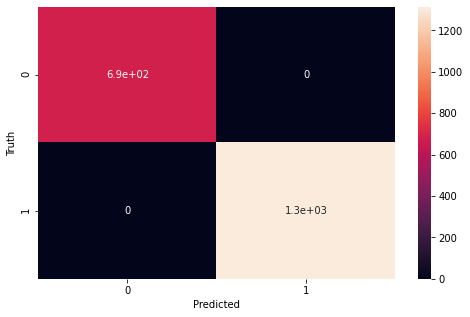

In [123]:
import seaborn as sns 
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [124]:
model.feature_importances_

array([0.1274173 , 0.12606078, 0.11885784, 0.12585555, 0.02859439,
       0.0295456 , 0.02964632, 0.02983872, 0.09308153, 0.09714323,
       0.09972423, 0.0942345 ])

In [125]:
from sklearn.ensemble import  ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100)
etc.fit(x_train,y_train)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [85]:
score = etc.score(x_train,y_train)
print("Score",score)
cv_scores = cross_val_score(etc,x_train,y_train,cv = 10)
print("CV ava Score:",cv_scores.mean())
ypred = etc.predict(x_test)
com = confusion_matrix(y_test,ypred)
print("Confussion Metrix:",com)


Score 1.0
CV ava Score: 0.92275
Confussion Metrix: [[ 577  110]
 [  26 1287]]


In [111]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [ ]:
from sklearn.metrics import roc_auc_score
results = []
n_estimators = [50, 100, 300, 500, 1000]
for trees in n_estimators:
  model = RandomForestClassifier(trees,oob_score=True,n_jobs=-1,random_state=1)
  model.fit(X,y)
  print(trees,"trees")
  roc = roc_auc_score (y, model.oob_pr)
  print("C-stat:",roc)
  results.append(roc)
pd.Series(results,n_estimator).plot();